<div style="color: red; font-size: 30px; text-align: center; font-weight: bold;">
    Online Food Order Prediction
</div>

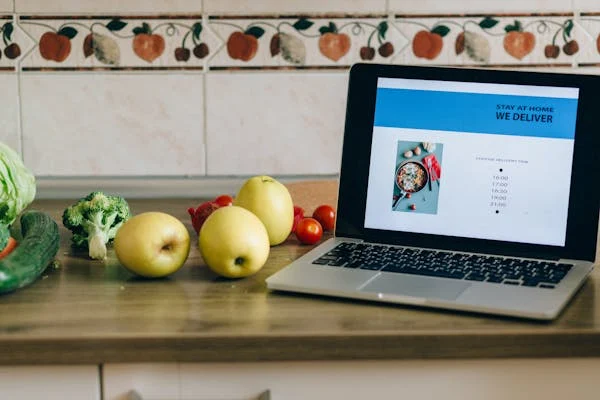

*********

Introduction :

The online food order prediction project offers significant benefits for food delivery platforms, restaurants, and customers alike. By accurately forecasting demand and optimizing resource allocation, the project helps minimize wait times, reduce food waste, and enhance the overall customer experience. Through continuous monitoring and refinement, the predictive model can adapt to changing consumer preferences and market dynamics, ensuring its relevance and effectiveness in the fast-paced food delivery industry.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('onlinefoods (2).csv')

In [3]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed                     388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed                       0
dtype: int64

In [8]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
data.drop(columns=['Unnamed'],inplace= True, axis=1)

In [10]:
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


In [11]:
import movecolumn as mc
mc.MoveToLast(data,'Output')

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Positive,Yes


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
sns.set_theme(style="whitegrid")

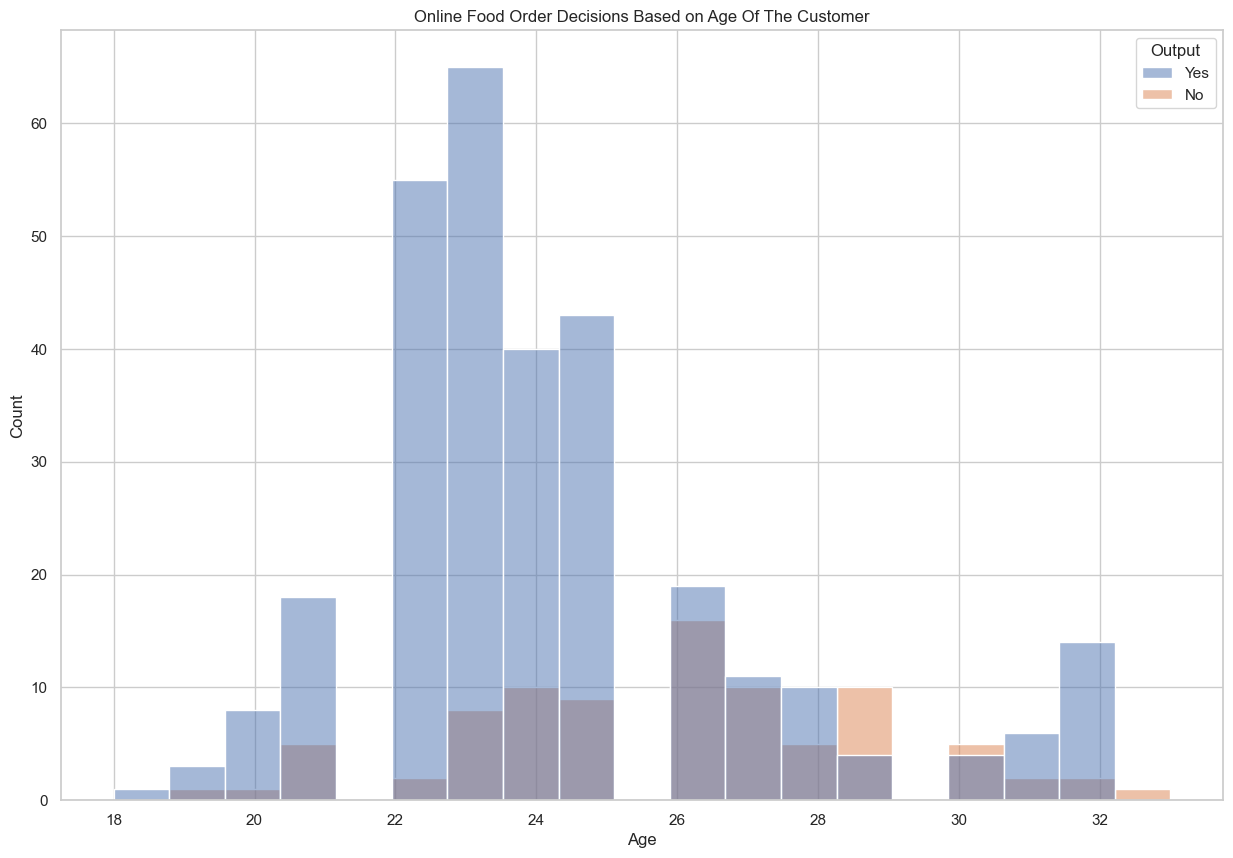

In [13]:
# Online Food Order Decisions Based on Age Of The Customer
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on Age Of The Customer")
sns.histplot(x="Age", hue= "Output", data=data)
plt.show()

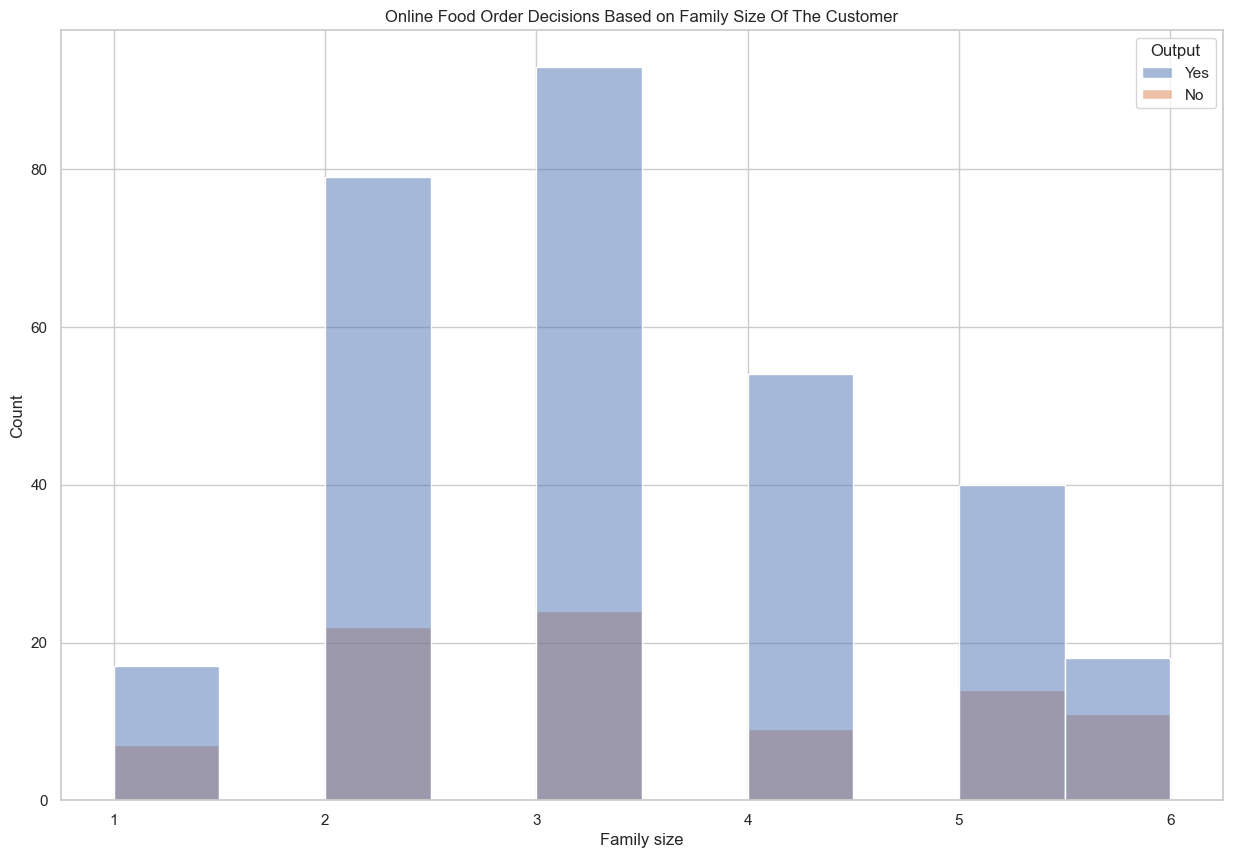

In [14]:
# Online Food Order Decisions Based on Family Size Of The Customer
plt.figure(figsize=(15,10))
plt.title("Online Food Order Decisions Based on Family Size Of The Customer")
sns.histplot(x="Family size", hue= "Output", data=data)
plt.show()

In [15]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes


In [16]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
data['Gender'] = data['Gender'].map({'Male': 1,
                                   'Female': 0})

In [18]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,0,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,1,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,0,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,1,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes


In [19]:
data['Marital Status'].unique()

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [20]:
data['Marital Status']= data['Marital Status'].map({'Married':2,
                                                   'Single': 1,
                                                   'Prefer not to say':0})

In [21]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,0,1,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,1,1,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,0,1,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,1,1,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes


In [22]:
data['Occupation'].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [23]:
data['Occupation']= data['Occupation'].map({'Student': 1,
                                           'Employee': 2,
                                           'Self Employed': 3,
                                           'House wife':4})

In [24]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,1.0,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,0,1,1.0,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,1,1,1.0,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,0,1,1.0,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,1,1,1.0,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes


In [25]:
data['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [26]:
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 50000, 
                                                     "More than 50000": 70000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})

In [27]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,1.0,0,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes
1,24,0,1,1.0,10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes
2,22,1,1,1.0,10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes
3,22,0,1,1.0,0,Graduate,6,12.9473,77.5616,560019,Positive,Yes
4,22,1,1,1.0,10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes


In [28]:
data['Educational Qualifications'].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [29]:
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})

In [30]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,1.0,0,2,4,12.9766,77.5993,560001,Positive,Yes
1,24,0,1,1.0,10000,1,3,12.9770,77.5773,560009,Positive,Yes
2,22,1,1,1.0,10000,2,3,12.9551,77.6593,560017,Negative,Yes
3,22,0,1,1.0,0,1,6,12.9473,77.5616,560019,Positive,Yes
4,22,1,1,1.0,10000,2,4,12.9850,77.5533,560010,Positive,Yes


In [31]:
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})

In [32]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,1.0,0,2,4,12.9766,77.5993,560001,1,Yes
1,24,0,1,1.0,10000,1,3,12.9770,77.5773,560009,1,Yes
2,22,1,1,1.0,10000,2,3,12.9551,77.6593,560017,0,Yes
3,22,0,1,1.0,0,1,6,12.9473,77.5616,560019,1,Yes
4,22,1,1,1.0,10000,2,4,12.9850,77.5533,560010,1,Yes


In [33]:
data['Pin code'].unique()

array([560001, 560009, 560017, 560019, 560010, 560103, 560042, 560048,
       560078, 560004, 560068, 560038, 560008, 560032, 560033, 560021,
       560085, 560050, 560098, 560003, 560066, 560034, 560102, 560025,
       560026, 560043, 560002, 560086, 560076, 560096, 560029, 560046,
       560030, 560024, 560020, 560028, 560064, 560036, 560011, 560061,
       560022, 560027, 560007, 560012, 560006, 560047, 560005, 560073,
       560016, 560013, 560051, 560015, 560018, 560109, 560023, 560104,
       560041, 560049, 560045, 560055, 560060, 560062, 560070, 560075,
       560080, 560092, 560095, 560097, 560093, 560091, 560100, 560079,
       560059, 560067, 560014, 560056, 560072], dtype=int64)

In [66]:
# Splitting data
x = data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size","Pin code", "Feedback"]]
y = data[["Output"]]

In [67]:
x.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Feedback
0,20,0,1,1.0,0,2,4,560001,1
1,24,0,1,1.0,10000,1,3,560009,1
2,22,1,1,1.0,10000,2,3,560017,0
3,22,0,1,1.0,0,1,6,560019,1
4,22,1,1,1.0,10000,2,4,560010,1


In [68]:
y.head()

,Output
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [69]:
from sklearn.model_selection import train_test_split

# Divide Data into training set and test set

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [70]:
#Perform Logistic Regression
from sklearn.linear_model import LogisticRegression

Log_Model = LogisticRegression(random_state = 0)

In [71]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Output
0,20,0,1,1.0,0,2,4,12.9766,77.5993,560001,1,Yes
1,24,0,1,1.0,10000,1,3,12.9770,77.5773,560009,1,Yes
2,22,1,1,1.0,10000,2,3,12.9551,77.6593,560017,0,Yes
3,22,0,1,1.0,0,1,6,12.9473,77.5616,560019,1,Yes
4,22,1,1,1.0,10000,2,4,12.9850,77.5533,560010,1,Yes


In [72]:
x.dtypes

Age                             int64
Gender                          int64
Marital Status                  int64
Occupation                    float64
Monthly Income                  int64
Educational Qualifications      int64
Family size                     int64
Pin code                        int64
Feedback                        int64
dtype: object

In [73]:
x.isnull().sum()

Age                            0
Gender                         0
Marital Status                 0
Occupation                    54
Monthly Income                 0
Educational Qualifications     0
Family size                    0
Pin code                       0
Feedback                       0
dtype: int64

In [74]:
x['Occupation'].unique()

array([ 1.,  2., nan,  4.])

In [75]:
x['Occupation'] = x['Occupation'].fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9632\1883301381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Occupation'] = x['Occupation'].fillna(0)


In [76]:
x.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
Pin code                      0
Feedback                      0
dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

# Divide Data into training set and test set

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [78]:
#Perform Logistic Regression
from sklearn.linear_model import LogisticRegression

Log_Model = LogisticRegression(random_state = 0)

In [79]:
#Fit The Regression Model
Log_Model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [80]:
#Show coefficients 
Log_Model.coef_

array([[-2.39033777e-09,  5.23909962e-11, -3.34085053e-10,
        -2.81381427e-11, -1.45529479e-05,  1.63978236e-10,
        -2.41986133e-10,  2.76075859e-06,  9.80315818e-10]])

In [81]:
#Print intercept
print(Log_Model.intercept_)

[4.93028444e-12]


In [82]:
#Make the prediction on Test Dataset
y_pred_lr = Log_Model.predict(x_test)

In [83]:
y_pred_lr

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [84]:
#Display Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[ 0, 12],
       [ 0, 66]], dtype=int64)

In [85]:
#Print Accuracy of Model
from sklearn import metrics
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(y_pred_lr,y_test)*100,'%')

The accuracy of the Logistic Regression is 84.61538461538461 %


# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9632\2696735292.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestClassifier()

In [87]:
y_pred_rf = model_rf.predict(x_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred_rf)

array([[ 7,  5],
       [ 3, 63]], dtype=int64)

In [89]:
#Print Accuracy of Model
from sklearn import metrics
print('The accuracy of the Random Forest is', metrics.accuracy_score(y_pred_rf,y_test)*100,'%')

The accuracy of the Random Forest is 89.74358974358975 %


The Accuracy of Logistic Regression model is 84% and accuracy for Random Forest Model is 895. So we will choose Random Forest Model for final prediction.

***********

Final Model Prediction using Random Forest

In [90]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model_rf.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 29
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Monthly Income: 4000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 3
Pin Code: 56001
Review of the Last Order (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  ['Yes']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


************

The model has made a prediction of 'Yes' based on the inputs we provided. This demonstrates how we can use machine learning to determine whether a customer will order again or not.

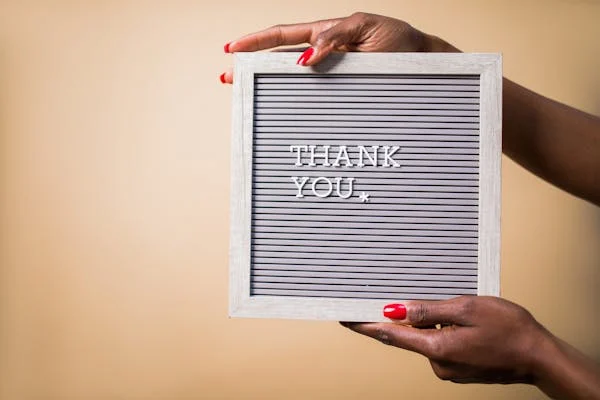